# Company Attrition Rate


In [98]:
## Importing the necessary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score,make_scorer, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler 
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, RandomizedSearchCV
from imblearn.pipeline import Pipeline
  
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from imblearn.pipeline import Pipeline

In [8]:
# Ignoring the warnings
warnings.filterwarnings("ignore")

In [9]:
# Loading the Data
data=pd.read_csv('Proj1.csv')

In [10]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


### In the dataset there are 4 irrelevant columns, i.e:EmployeeCount, EmployeeNumber, Over18 and StandardHour. So, we have to remove these for more accuracy.

In [11]:
data=data.drop(columns=['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)

In [12]:
data=pd.get_dummies(data, columns=['BusinessTravel','Department','EducationField','JobRole','Gender','MaritalStatus','OverTime'], drop_first=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                1470 non-null   int64 
 1   Attrition                          1470 non-null   object
 2   DailyRate                          1470 non-null   int64 
 3   DistanceFromHome                   1470 non-null   int64 
 4   Education                          1470 non-null   int64 
 5   EnvironmentSatisfaction            1470 non-null   int64 
 6   HourlyRate                         1470 non-null   int64 
 7   JobInvolvement                     1470 non-null   int64 
 8   JobLevel                           1470 non-null   int64 
 9   JobSatisfaction                    1470 non-null   int64 
 10  MonthlyIncome                      1470 non-null   int64 
 11  MonthlyRate                        1470 non-null   int64 
 12  NumCom

## Encoding the final label form yes, no to 1 and 0.

In [14]:
label_encoder = LabelEncoder()
# Encode labels in column 'Country'. 
data['Attrition']= label_encoder.fit_transform(data['Attrition']) 

In [15]:
data

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,0,0,0,0,1,0,0,0,1,1
1,49,0,279,8,1,3,61,2,2,2,...,0,0,0,1,0,0,1,1,0,0
2,37,1,1373,2,2,4,92,2,1,3,...,0,0,0,0,0,0,1,0,1,1
3,33,0,1392,3,4,4,56,3,1,3,...,0,0,0,1,0,0,0,1,0,1
4,27,0,591,2,1,1,40,3,1,2,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,41,4,2,4,...,0,0,0,0,0,0,1,1,0,0
1466,39,0,613,6,1,4,42,2,3,1,...,0,0,0,0,0,0,1,1,0,0
1467,27,0,155,4,3,2,87,4,2,2,...,0,1,0,0,0,0,1,1,0,1
1468,49,0,1023,2,3,4,63,2,2,2,...,0,0,0,0,1,0,1,1,0,0


In [16]:
data_X=data.drop(columns=['Attrition'],axis=1)

In [17]:
data_y=data['Attrition']

In [18]:
### Prediction accuracy and f1 without vif on base datasets

X_train, X_test, y_train, y_test = train_test_split(data_X,data_y, random_state=42, test_size=.2)


In [19]:
# Making a list of models which we are going to implement.

model_pipeline=[]
model_pipeline.append(LogisticRegression(solver='liblinear',random_state=42))
model_pipeline.append(DecisionTreeClassifier(random_state=42))
model_pipeline.append(RandomForestClassifier(random_state=42))
model_pipeline.append(SVC(random_state=42))
model_pipeline.append(KNeighborsClassifier())
model_pipeline.append(GaussianNB())
model_pipeline.append(XGBClassifier(random_state=42))


In [20]:
kf =KFold(n_splits=5, shuffle=True, random_state=42)


In [21]:
# Performing cross validation to get the model score. Here we are not checking the accuracy as data is imbalanced.

f1_scr_cv=[]
for model in model_pipeline:
    print(model)
    score = cross_val_score(model, data_X,data_y, cv= kf, scoring="f1_weighted")
    f1_scr_cv.append(score.mean())

LogisticRegression(random_state=42, solver='liblinear')
DecisionTreeClassifier(random_state=42)
RandomForestClassifier(random_state=42)
SVC(random_state=42)
KNeighborsClassifier()
GaussianNB()
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42,
              reg_alpha=None, reg_lambda=None, ...)


In [22]:
print('Scores before VIF')

print(f1_scr_cv)

Scores before VIF
[0.8489595610262226, 0.797471583384777, 0.8137346924321831, 0.7653997229802586, 0.7873884780626852, 0.7866365879763373, 0.8396067036875466]


### Checking for outliers

In [23]:
data_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   HourlyRate                         1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyIncome                      1470 non-null   int64
 10  MonthlyRate                        1470 non-null   int64
 11  NumCompaniesWorked                 1470 non-null   int64
 12  PercentSalaryHike   

In [24]:
data_X.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_S

In [25]:
# Selecting only those columns which have continous data. 
# Because, for categorical there won't be outliers. Since, we only converted it into 0's and 1's.

col_selected=['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

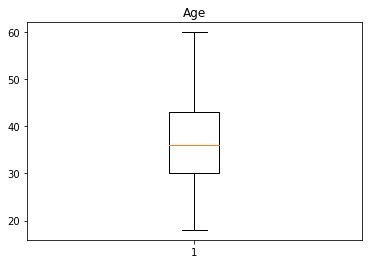

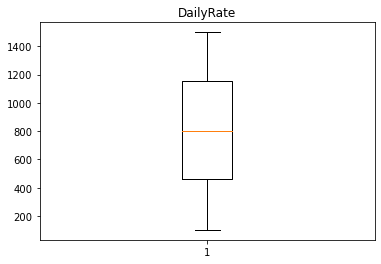

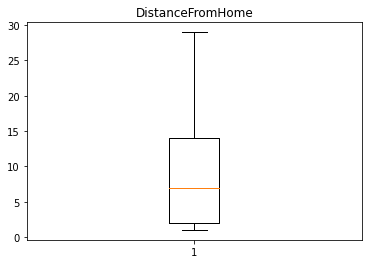

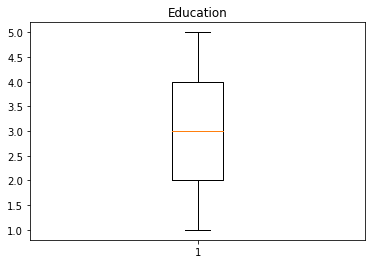

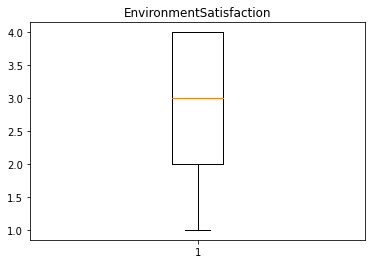

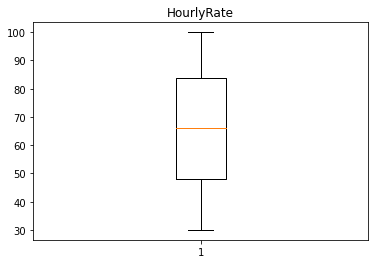

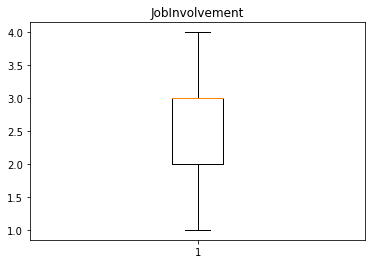

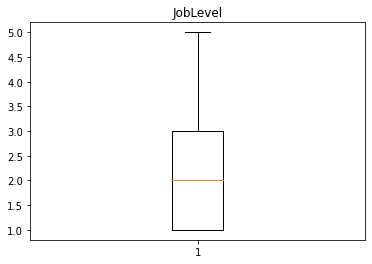

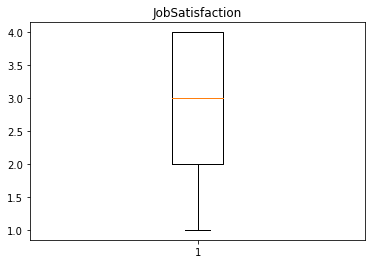

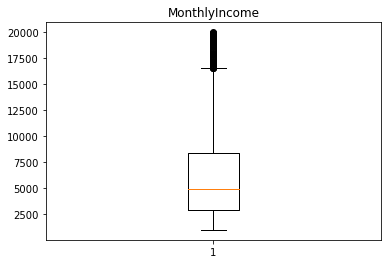

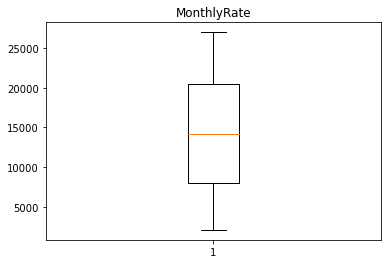

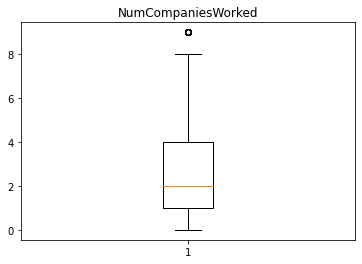

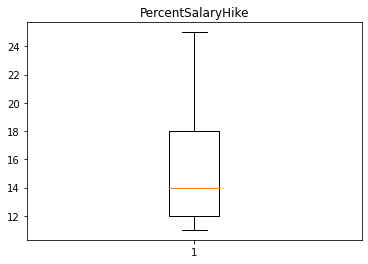

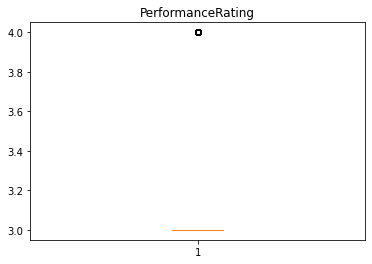

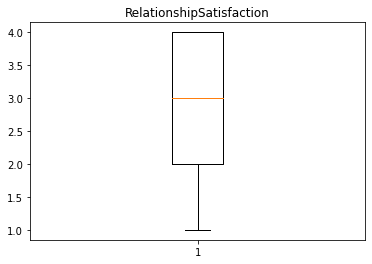

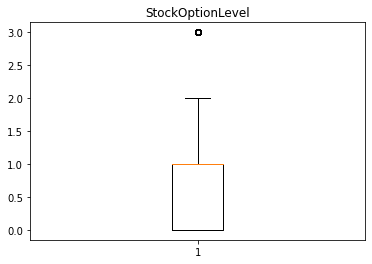

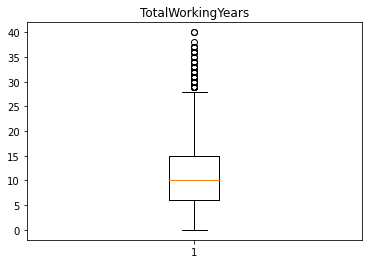

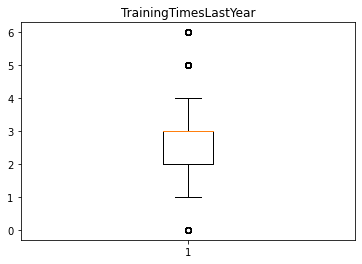

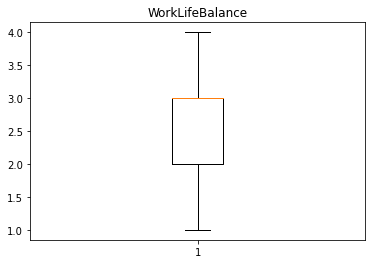

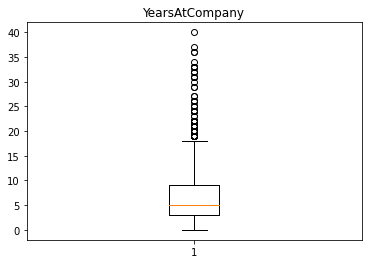

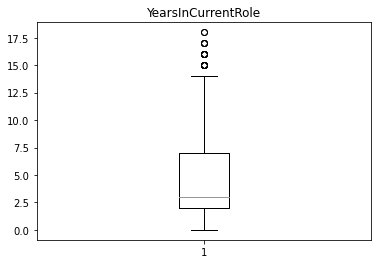

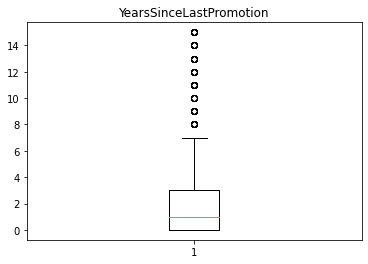

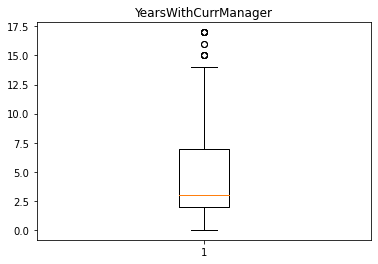

In [26]:
i = 0

for item in col_selected:
    plt.figure(i)
    plt.boxplot(data_X[item])
    plt.title(item)
    i+=1
## Identifying the columns with outliers

In [27]:
## Taking only those columns which have outliers

In [28]:
col_with_outlier=['MonthlyIncome', 'NumCompaniesWorked','PerformanceRating',
        'StockOptionLevel', 'TotalWorkingYears','YearsAtCompany',
       'TrainingTimesLastYear', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

## Handling the outliers by quantile based flooring and capping method.

In [29]:
for col in col_with_outlier:
    percentile25 = data_X[col].quantile(0.25)
    percentile75 = data_X[col].quantile(0.75)

    iqr=percentile75-percentile25

    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    
#     new_df_cap = X.copy()
    data_X[col] = np.where(
        data_X[col] > upper_limit,
        upper_limit,
        np.where(
            data_X[col] < lower_limit,
            lower_limit,
            data_X[col]
        )
    )

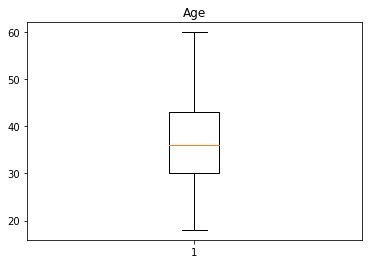

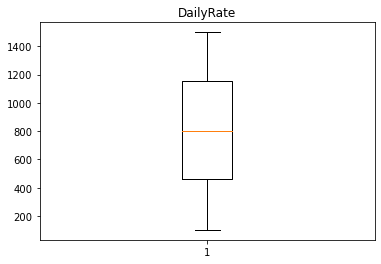

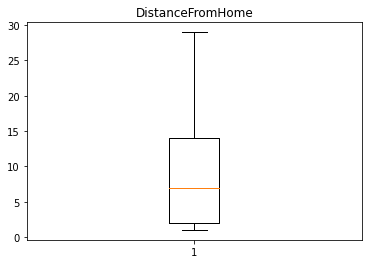

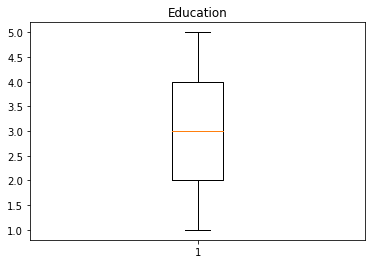

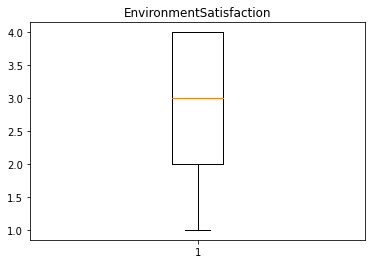

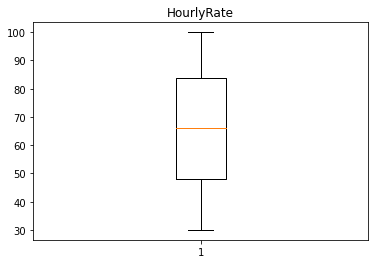

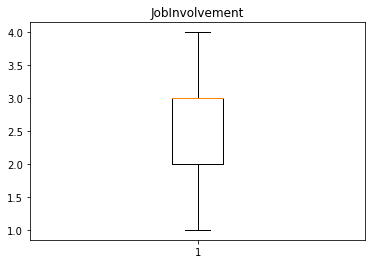

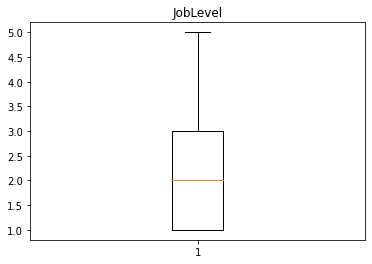

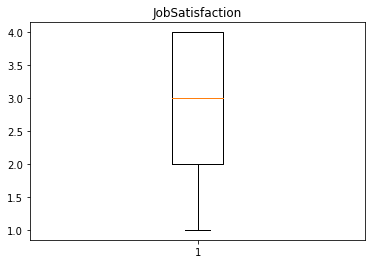

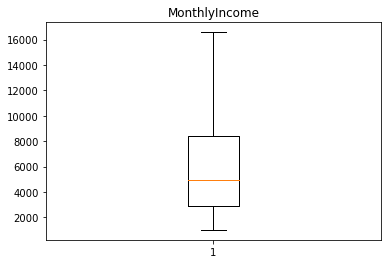

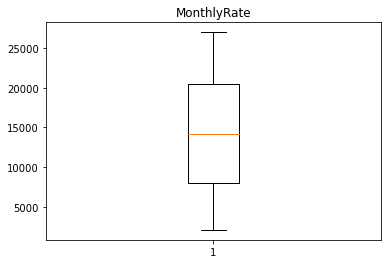

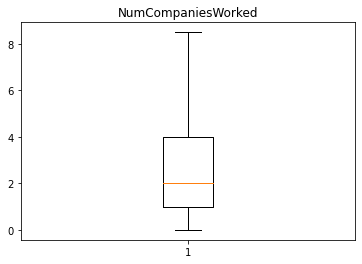

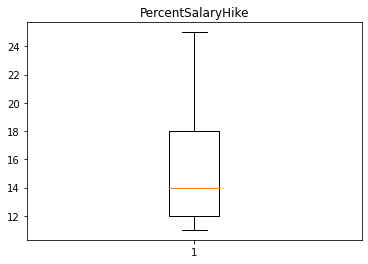

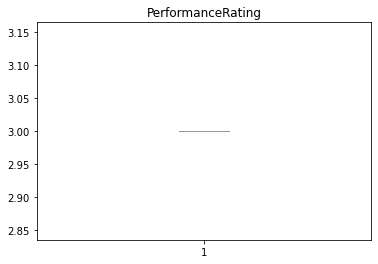

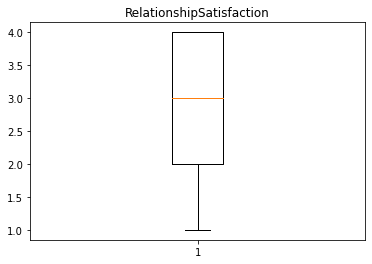

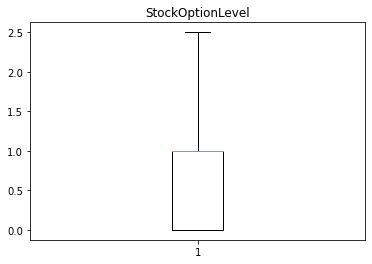

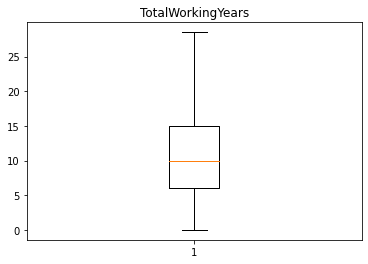

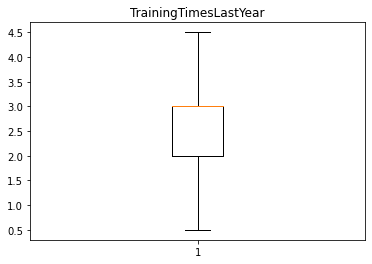

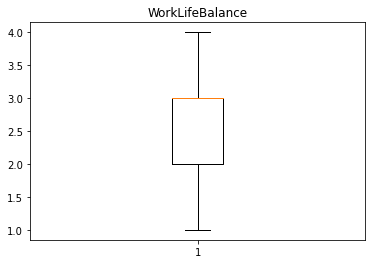

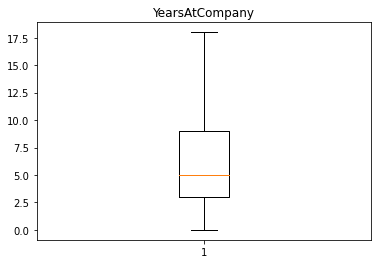

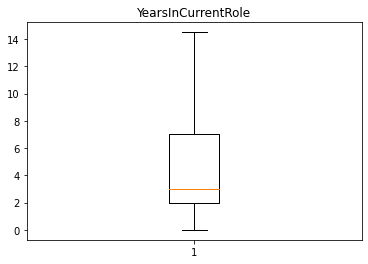

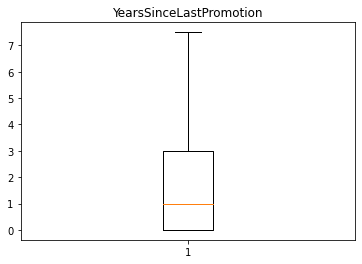

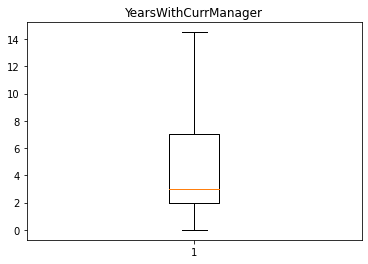

In [30]:
## Here we can see that outliers have been removed.
i = 0

for item in col_selected:
    plt.figure(i)
    plt.boxplot(data_X[item])
    plt.title(item)
    i+=1


In [31]:
# All the outliers have ben capped

### Performing VIF (Variance Inflation Factor) to check multicolinearity.

In [32]:

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [33]:
calc_vif(data_X)

,variables,VIF
0,Age,2.077520
1,DailyRate,1.035013
2,DistanceFromHome,1.022628
3,Education,1.082939
4,EnvironmentSatisfaction,1.031659
5,HourlyRate,1.027456
6,JobInvolvement,1.028332
7,JobLevel,11.893113
8,JobSatisfaction,1.026215
9,MonthlyIncome,14.592284


### Dropping those colums with VIF value more than 10

In [34]:
data_X.drop(columns='PerformanceRating',axis=1,inplace=True)

In [35]:
calc_vif(data_X)

,variables,VIF
0,Age,34.867071
1,DailyRate,5.086262
2,DistanceFromHome,2.327382
3,Education,9.647377
4,EnvironmentSatisfaction,7.269588
5,HourlyRate,11.510718
6,JobInvolvement,15.518372
7,JobLevel,52.029209
8,JobSatisfaction,7.162611
9,MonthlyIncome,45.755402


In [36]:
data_X.drop(columns='Department_Research & Development',axis=1,inplace=True)

In [37]:
calc_vif(data_X)

,variables,VIF
0,Age,34.489122
1,DailyRate,5.067900
2,DistanceFromHome,2.327277
3,Education,9.596498
4,EnvironmentSatisfaction,7.232453
5,HourlyRate,11.387148
6,JobInvolvement,15.308098
7,JobLevel,51.846301
8,JobSatisfaction,7.111373
9,MonthlyIncome,45.627040


In [38]:
data_X.drop(columns='JobLevel',axis=1,inplace=True)

In [39]:
calc_vif(data_X)

,variables,VIF
0,Age,34.427818
1,DailyRate,5.067895
2,DistanceFromHome,2.323141
3,Education,9.596264
4,EnvironmentSatisfaction,7.214784
5,HourlyRate,11.386043
6,JobInvolvement,15.272847
7,JobSatisfaction,7.098184
8,MonthlyIncome,24.454720
9,MonthlyRate,5.008073


In [40]:
data_X.drop(columns='Age',axis=1,inplace=True)

In [41]:
calc_vif(data_X)

,variables,VIF
0,DailyRate,5.067816
1,DistanceFromHome,2.323127
2,Education,9.289972
3,EnvironmentSatisfaction,7.181921
4,HourlyRate,11.340251
5,JobInvolvement,15.142005
6,JobSatisfaction,7.066959
7,MonthlyIncome,24.447348
8,MonthlyRate,4.992405
9,NumCompaniesWorked,2.768126


In [42]:
data_X.drop(columns='MonthlyIncome',axis=1,inplace=True)

In [43]:
calc_vif(data_X)

,variables,VIF
0,DailyRate,5.059778
1,DistanceFromHome,2.320379
2,Education,9.282450
3,EnvironmentSatisfaction,7.169458
4,HourlyRate,11.331823
5,JobInvolvement,15.141934
6,JobSatisfaction,7.058962
7,MonthlyRate,4.988228
8,NumCompaniesWorked,2.767937
9,PercentSalaryHike,16.975901


In [44]:
data_X.drop(columns='EducationField_Life Sciences',axis=1,inplace=True)
calc_vif(data_X)

,variables,VIF
0,DailyRate,4.972624
1,DistanceFromHome,2.318136
2,Education,9.179121
3,EnvironmentSatisfaction,7.049180
4,HourlyRate,10.888146
5,JobInvolvement,14.642011
6,JobSatisfaction,6.891334
7,MonthlyRate,4.934453
8,NumCompaniesWorked,2.766237
9,PercentSalaryHike,16.031872


In [45]:
data_X.drop(columns='Department_Sales',axis=1,inplace=True)
calc_vif(data_X)

,variables,VIF
0,DailyRate,4.972540
1,DistanceFromHome,2.318136
2,Education,9.178991
3,EnvironmentSatisfaction,7.043166
4,HourlyRate,10.887000
5,JobInvolvement,14.632762
6,JobSatisfaction,6.889854
7,MonthlyRate,4.934447
8,NumCompaniesWorked,2.764554
9,PercentSalaryHike,16.020915


In [46]:
data_X.drop(columns='YearsAtCompany',axis=1,inplace=True)
calc_vif(data_X)

,variables,VIF
0,DailyRate,4.968946
1,DistanceFromHome,2.318014
2,Education,9.178142
3,EnvironmentSatisfaction,7.040348
4,HourlyRate,10.881824
5,JobInvolvement,14.626110
6,JobSatisfaction,6.865852
7,MonthlyRate,4.930635
8,NumCompaniesWorked,2.653189
9,PercentSalaryHike,16.018207


In [47]:
data_X.drop(columns='PercentSalaryHike',axis=1,inplace=True)
calc_vif(data_X)

,variables,VIF
0,DailyRate,4.927134
1,DistanceFromHome,2.305543
2,Education,9.116325
3,EnvironmentSatisfaction,7.020141
4,HourlyRate,10.764678
5,JobInvolvement,14.458320
6,JobSatisfaction,6.774438
7,MonthlyRate,4.901175
8,NumCompaniesWorked,2.650899
9,RelationshipSatisfaction,7.123564


In [48]:
data_X.drop(columns='WorkLifeBalance',axis=1,inplace=True)
calc_vif(data_X)

,variables,VIF
0,DailyRate,4.923487
1,DistanceFromHome,2.305370
2,Education,9.026155
3,EnvironmentSatisfaction,6.929261
4,HourlyRate,10.621812
5,JobInvolvement,14.288336
6,JobSatisfaction,6.731980
7,MonthlyRate,4.865660
8,NumCompaniesWorked,2.650114
9,RelationshipSatisfaction,7.052800


In [49]:
data_X.drop(columns='JobInvolvement',axis=1,inplace=True)
calc_vif(data_X)

,variables,VIF
0,DailyRate,4.860488
1,DistanceFromHome,2.300778
2,Education,8.852257
3,EnvironmentSatisfaction,6.874532
4,HourlyRate,10.365156
5,JobSatisfaction,6.687682
6,MonthlyRate,4.839924
7,NumCompaniesWorked,2.644958
8,RelationshipSatisfaction,6.949949
9,StockOptionLevel,3.822246


### Training model after the vif


In [85]:
X=data_X.copy()

In [86]:
y=data_y.copy()

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size= .3)

In [88]:
f1_scr_1_cv=[]
for model in model_pipeline:
    print(model)
    model_diff=model.fit(X_train, y_train)
    y_pred = model_diff.predict(X_test)
    
    f1_scr_1_cv.append(f1_score(y_test, y_pred,average='weighted'))
    

LogisticRegression(random_state=42, solver='liblinear')
DecisionTreeClassifier(random_state=42)
RandomForestClassifier(random_state=42)
SVC(random_state=42)
KNeighborsClassifier()
GaussianNB()
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)


In [89]:
print('Scores after VIF')

print(f1_scr_1_cv)

Scores after VIF
[0.8308589763780536, 0.7952892115400985, 0.8283020438893136, 0.7976556436622558, 0.7954676179414856, 0.8150889990227208, 0.8460468955321763]


#### After performing Outlier Analysis and VIF(i.e reducing multicolinearity hence, decreasing number of features). Still, we are getting same or increased model scores while reducing the model complexity.

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [91]:

f1_scr_2_cv=[]
for model in model_pipeline:
    print(model)

    model_diff=model.fit(X_train_scaled, y_train)
    y_pred = model_diff.predict(X_test_scaled)
    
    f1_scr_2_cv.append(f1_score(y_test, y_pred,average='weighted'))

LogisticRegression(random_state=42, solver='liblinear')
DecisionTreeClassifier(random_state=42)
RandomForestClassifier(random_state=42)
SVC(random_state=42)
KNeighborsClassifier()
GaussianNB()
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)


In [92]:
print('Scores after VIF and scaling')

print(f1_scr_2_cv)

Scores after VIF and scaling
[0.8541032890296791, 0.7952892115400985, 0.8314502370105038, 0.8372034750085978, 0.8135100713425426, 0.7330817211769592, 0.8460468955321763]


#### So, after doing Scaling the scores of the models which works inherently on distance between data points got increased. While there were no changes in tree based models because scaling doesn't effect them as they don't depend on distance between data points. 

### Since, the data suffers from class imbalance. Performing oversampling method to generate the new data points in such a way that the number of minority class gets equal to majority class

In [93]:
ros = RandomOverSampler()
# resampling X, y
X_train_ros, y_train_ros = ros.fit_resample(X_train_scaled, y_train)

In [94]:
acc_score_3=[]
f1_scr_3=[]
for model in model_pipeline:
    print(model)
    model_diff=model.fit(X_train_ros, y_train_ros)
    y_pred = model_diff.predict(X_test_scaled)
    f1_scr_3.append(f1_score(y_test, y_pred,average='weighted'))

LogisticRegression(random_state=42, solver='liblinear')
DecisionTreeClassifier(random_state=42)
RandomForestClassifier(random_state=42)
SVC(random_state=42)
KNeighborsClassifier()
GaussianNB()
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)


In [96]:
print('Scores after scaling and vif and over sampling')
print(f1_scr_3)

Scores after scaling and vif and over sampling
[0.7816279824156589, 0.7839497338595715, 0.8357775255105974, 0.8314807924104659, 0.739536289112542, 0.625694109874359, 0.8442119865910132]


#### After doing the Over Sampling score of some model got incresed while some didn't.

### Hyper Parameter Tuning

In [1457]:
## After oversampling random forest and XGB is the best performing model 

In [72]:
## Modifying it for all the models

In [99]:
models_new=[('logisticregression', LogisticRegression(solver='liblinear')),('DecisionTrees', DecisionTreeClassifier()),
           ('RandomForest', RandomForestClassifier()),('KNN', KNeighborsClassifier()),('NaiveBayes', GaussianNB()),('XGB',XGBClassifier())]

In [100]:
step = [('standardscaler', StandardScaler()),('randomSampler', RandomOverSampler()),]

In [101]:
for i in models_new:
    step.append(i)
    pipe=Pipeline(steps=step)
    print(step)
    score = cross_val_score(pipe, X, y, cv= kf, scoring="f1_weighted")
    
    print(f'Scores for each fold: {score}')
    print(score.mean())
    
    step.pop()
    

[('standardscaler', StandardScaler()), ('randomSampler', RandomOverSampler()), ('logisticregression', LogisticRegression(solver='liblinear'))]
Scores for each fold: [0.76162403 0.81793828 0.80262391 0.77672801 0.7564325 ]
0.7830693451346693
[('standardscaler', StandardScaler()), ('randomSampler', RandomOverSampler()), ('DecisionTrees', DecisionTreeClassifier())]
Scores for each fold: [0.82922979 0.78346023 0.78381139 0.76208281 0.70134114]
0.7719850693655529
[('standardscaler', StandardScaler()), ('randomSampler', RandomOverSampler()), ('RandomForest', RandomForestClassifier())]
Scores for each fold: [0.84645171 0.82427776 0.82341647 0.82006416 0.80304737]
0.823451495872936
[('standardscaler', StandardScaler()), ('randomSampler', RandomOverSampler()), ('KNN', KNeighborsClassifier())]
Scores for each fold: [0.7514652  0.7590385  0.72860787 0.73294331 0.70993156]
0.7363972874846785
[('standardscaler', StandardScaler()), ('randomSampler', RandomOverSampler()), ('NaiveBayes', GaussianNB())

In [102]:
X_train,X_test,y_train,y_test = train_test_split(data_X,data_y,test_size=.3,random_state=42,stratify=y)

In [103]:
pipe = Pipeline(steps = [('StdScale',StandardScaler()),('Random',RandomOverSampler()),('rf',RandomForestClassifier())])


In [104]:
# Providing only base model parameter. So, that we can compare this with our tuned model.
grid_params = {'rf__bootstrap': [True]}

In [105]:
grid_search = GridSearchCV(estimator=pipe,param_grid=grid_params,cv = 3,scoring='f1_weighted')

In [106]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('StdScale', StandardScaler()),
                                       ('Random', RandomOverSampler()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__bootstrap': [True]}, scoring='f1_weighted')

In [107]:
best_model = grid_search.best_estimator_

In [108]:
best_model

Pipeline(steps=[('StdScale', StandardScaler()), ('Random', RandomOverSampler()),
                ('rf', RandomForestClassifier())])

In [110]:
y_validation_preds = best_model.predict(X_test)

In [111]:
f1_score(y_test, y_validation_preds,average='weighted')

0.8117291436897827

In [114]:
### Grid searchCV

In [115]:

param_grid ={'rf__n_estimators': [100, 200, 300],
           'rf__min_samples_split': [8, 10, 12],  
 'rf__min_samples_leaf': [3, 4, 5],
 'rf__max_depth': [80, 90, 100, 110],
    'rf__max_features': [2, 3],
 'rf__bootstrap': [True]}

In [116]:
pipe = Pipeline(steps = [('StdScale',StandardScaler()),('Random',RandomOverSampler(random_state=42)),('rf',RandomForestClassifier(random_state=42))])
# pipe=make_pipeline(StandardScaler(),RandomOverSampler(),SVC())


In [117]:
grid_search_rf = GridSearchCV(estimator = pipe, param_grid = param_grid, cv = 5, verbose=3, n_jobs = -1)

In [118]:
warnings.filterwarnings("ignore")

In [119]:
grid_search_rf.fit(X_train,y_train)
best_model = grid_search_rf.best_estimator_
y_validation_preds = best_model.predict(X_test)
f1=f1_score(y_test, y_validation_preds,average='weighted')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 4/5] END rf__bootstrap=True, rf__max_depth=80, rf__max_features=2, rf__min_samples_leaf=3, rf__min_samples_split=8, rf__n_estimators=100;, score=0.850 total time=   0.2s
[CV 4/5] END rf__bootstrap=True, rf__max_depth=80, rf__max_features=2, rf__min_samples_leaf=3, rf__min_samples_split=8, rf__n_estimators=200;, score=0.854 total time=   0.5s
[CV 2/5] END rf__bootstrap=True, rf__max_depth=80, rf__max_features=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=100;, score=0.879 total time=   0.2s
[CV 2/5] END rf__bootstrap=True, rf__max_depth=80, rf__max_features=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=200;, score=0.888 total time=   0.4s
[CV 1/5] END rf__bootstrap=True, rf__max_depth=80, rf__max_features=2, rf__min_samples_leaf=3, rf__min_samples_split=12, rf__n_estimators=100;, score=0.830 total time=   0.2s
[CV 4/5] END rf__bootstrap=True, rf__max_depth=80, rf__max_feat

[CV 1/5] END rf__bootstrap=True, rf__max_depth=80, rf__max_features=2, rf__min_samples_leaf=3, rf__min_samples_split=8, rf__n_estimators=200;, score=0.859 total time=   0.4s
[CV 5/5] END rf__bootstrap=True, rf__max_depth=80, rf__max_features=2, rf__min_samples_leaf=3, rf__min_samples_split=8, rf__n_estimators=300;, score=0.873 total time=   0.6s
[CV 2/5] END rf__bootstrap=True, rf__max_depth=80, rf__max_features=2, rf__min_samples_leaf=3, rf__min_samples_split=10, rf__n_estimators=300;, score=0.893 total time=   0.5s
[CV 1/5] END rf__bootstrap=True, rf__max_depth=80, rf__max_features=2, rf__min_samples_leaf=3, rf__min_samples_split=12, rf__n_estimators=200;, score=0.845 total time=   0.3s
[CV 4/5] END rf__bootstrap=True, rf__max_depth=80, rf__max_features=2, rf__min_samples_leaf=3, rf__min_samples_split=12, rf__n_estimators=300;, score=0.850 total time=   0.6s
[CV 1/5] END rf__bootstrap=True, rf__max_depth=80, rf__max_features=2, rf__min_samples_leaf=4, rf__min_samples_split=8, rf__n_e

In [121]:
f1

0.8397231456897821


### Now, XG boost

In [122]:
X_train,X_test,y_train,y_test = train_test_split(data_X,data_y,random_state=42,stratify=y)

In [123]:
param_grid = {
    'xg__booster': ['gbtree'],
}


In [124]:
pipe = Pipeline(steps = [('StdScale',StandardScaler()),('Random',RandomOverSampler(random_state=42)),('xg',XGBClassifier(random_state=42))])



In [125]:

grid_search_rf = GridSearchCV(estimator = pipe, param_grid = param_grid, cv = 3, verbose=2, n_jobs = -1)

In [126]:
grid_search_rf.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('StdScale', StandardScaler()),
                                       ('Random',
                                        RandomOverSampler(random_state=42)),
                                       ('xg',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_po...
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_bin=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=42,
                                                      reg_alpha=None,
                                                      reg_lambda=None, ...))]),
             n_jobs=-1, param_grid={'xg__booster': ['gbtree']}, verbose=2)

In [127]:
best_model = grid_search_rf.best_estimator_

In [128]:
y_validation_preds = best_model.predict(X_test)

In [129]:
f1_score(y_test, y_validation_preds,average='weighted')

0.8314995166612961

In [130]:
######### Now parameter tuning


In [131]:
params = { 'xg__max_depth': [3, 5, 6, 10, 15, 20],
           'xg__learning_rate': [0.01, 0.1, 0.2, 0.3],
           'xg__subsample': [0.5, .8, 0.1],
           'xg__colsample_bytree': [0.4, .7, 1.0],
           'xg__colsample_bylevel': [0.4, .7, 1.0],
           'xg__n_estimators': [100, 500, 700]}

In [132]:
pipe = Pipeline(steps = [('StdScale',StandardScaler()),('Random',RandomOverSampler(random_state=42)),('xg',XGBClassifier(random_state=42))])



In [134]:
grid_search_dt = GridSearchCV(estimator = pipe, param_grid = params, cv = 3, verbose=3, n_jobs = -1)

In [135]:
grid_search_dt.fit(X_train,y_train)

Fitting 3 folds for each of 1944 candidates, totalling 5832 fits
[CV 1/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_depth=3, xg__n_estimators=100, xg__subsample=0.1;, score=0.774 total time=   0.1s
[CV 2/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_depth=3, xg__n_estimators=700, xg__subsample=0.8;, score=0.831 total time=   0.6s
[CV 3/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_depth=3, xg__n_estimators=700, xg__subsample=0.8;, score=0.826 total time=   0.5s
[CV 3/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_depth=5, xg__n_estimators=700, xg__subsample=0.8;, score=0.872 total time=   0.8s
[CV 1/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_depth=5, xg__n_estimators=700, xg__subsample=0.1;, score=0.812 total time=   0.6s
[CV 3/3] END xg__colsample_bylevel=

[CV 3/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.4, xg__learning_rate=0.1, xg__max_depth=3, xg__n_estimators=100, xg__subsample=0.5;, score=0.861 total time=   0.1s
[CV 2/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.4, xg__learning_rate=0.1, xg__max_depth=3, xg__n_estimators=100, xg__subsample=0.8;, score=0.823 total time=   0.1s
[CV 1/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.4, xg__learning_rate=0.1, xg__max_depth=3, xg__n_estimators=100, xg__subsample=0.1;, score=0.799 total time=   0.1s
[CV 3/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.4, xg__learning_rate=0.1, xg__max_depth=3, xg__n_estimators=100, xg__subsample=0.1;, score=0.796 total time=   0.1s
[CV 2/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.4, xg__learning_rate=0.1, xg__max_depth=3, xg__n_estimators=500, xg__subsample=0.5;, score=0.858 total time=   0.6s
[CV 1/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.4, xg__learning_rate=0.1, xg__max_depth=3,

[CV 3/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_depth=3, xg__n_estimators=100, xg__subsample=0.8;, score=0.815 total time=   0.1s
[CV 3/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_depth=5, xg__n_estimators=100, xg__subsample=0.8;, score=0.845 total time=   0.1s
[CV 1/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_depth=5, xg__n_estimators=100, xg__subsample=0.1;, score=0.791 total time=   0.1s
[CV 3/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_depth=5, xg__n_estimators=500, xg__subsample=0.5;, score=0.861 total time=   0.6s
[CV 1/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_depth=5, xg__n_estimators=500, xg__subsample=0.8;, score=0.856 total time=   0.6s
[CV 3/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_de

[CV] END .................................xg__booster=gbtree; total time=   0.2s
[CV 2/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_depth=3, xg__n_estimators=100, xg__subsample=0.5;, score=0.807 total time=   0.1s
[CV 3/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_depth=3, xg__n_estimators=100, xg__subsample=0.1;, score=0.777 total time=   0.1s
[CV 3/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_depth=3, xg__n_estimators=500, xg__subsample=0.5;, score=0.817 total time=   0.4s
[CV 3/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_depth=3, xg__n_estimators=500, xg__subsample=0.8;, score=0.817 total time=   0.4s
[CV 1/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_depth=3, xg__n_estimators=700, xg__subsample=0.5;, score=0.818 total time=   0.6s
[CV 2/3] END xg__co

[CV] END .................................xg__booster=gbtree; total time=   0.2s
[CV 2/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_depth=3, xg__n_estimators=100, xg__subsample=0.1;, score=0.796 total time=   0.1s
[CV 2/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_depth=3, xg__n_estimators=500, xg__subsample=0.5;, score=0.831 total time=   0.3s
[CV 2/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_depth=3, xg__n_estimators=500, xg__subsample=0.8;, score=0.839 total time=   0.4s
[CV 2/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_depth=3, xg__n_estimators=500, xg__subsample=0.1;, score=0.826 total time=   0.3s
[CV 3/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_depth=3, xg__n_estimators=500, xg__subsample=0.1;, score=0.826 total time=   0.3s
[CV 1/3] END xg__co

[CV] END .................................xg__booster=gbtree; total time=   0.2s
[CV 2/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_depth=3, xg__n_estimators=100, xg__subsample=0.8;, score=0.815 total time=   0.1s
[CV 1/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_depth=3, xg__n_estimators=500, xg__subsample=0.5;, score=0.807 total time=   0.4s
[CV 1/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_depth=3, xg__n_estimators=500, xg__subsample=0.8;, score=0.802 total time=   0.4s
[CV 1/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_depth=3, xg__n_estimators=500, xg__subsample=0.1;, score=0.788 total time=   0.3s
[CV 3/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_depth=3, xg__n_estimators=700, xg__subsample=0.5;, score=0.828 total time=   0.6s
[CV 1/3] END xg__co

[CV 1/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_depth=3, xg__n_estimators=100, xg__subsample=0.5;, score=0.791 total time=   0.1s
[CV 3/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_depth=3, xg__n_estimators=700, xg__subsample=0.1;, score=0.817 total time=   0.4s
[CV 1/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_depth=5, xg__n_estimators=100, xg__subsample=0.5;, score=0.818 total time=   0.1s
[CV 1/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_depth=5, xg__n_estimators=500, xg__subsample=0.1;, score=0.810 total time=   0.4s
[CV 2/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_depth=5, xg__n_estimators=500, xg__subsample=0.1;, score=0.837 total time=   0.4s
[CV 1/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_de

[CV 2/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.01, xg__max_depth=20, xg__n_estimators=700, xg__subsample=0.1;, score=0.847 total time=   0.7s
[CV 1/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.1, xg__max_depth=5, xg__n_estimators=500, xg__subsample=0.5;, score=0.861 total time=   0.6s
[CV 3/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.1, xg__max_depth=5, xg__n_estimators=700, xg__subsample=0.5;, score=0.866 total time=   0.8s
[CV 2/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.1, xg__max_depth=5, xg__n_estimators=700, xg__subsample=0.1;, score=0.839 total time=   0.5s
[CV 1/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.1, xg__max_depth=6, xg__n_estimators=500, xg__subsample=0.1;, score=0.793 total time=   0.4s
[CV 1/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.1, xg__max_depth=

[CV 1/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.1, xg__max_depth=3, xg__n_estimators=700, xg__subsample=0.8;, score=0.848 total time=   0.6s
[CV 1/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.1, xg__max_depth=6, xg__n_estimators=100, xg__subsample=0.8;, score=0.864 total time=   0.1s
[CV 3/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.1, xg__max_depth=6, xg__n_estimators=100, xg__subsample=0.1;, score=0.826 total time=   0.1s
[CV 3/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.1, xg__max_depth=6, xg__n_estimators=500, xg__subsample=0.8;, score=0.866 total time=   0.6s
[CV 1/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.1, xg__max_depth=6, xg__n_estimators=700, xg__subsample=0.1;, score=0.804 total time=   0.6s
[CV 3/3] END xg__colsample_bylevel=0.4, xg__colsample_bytree=0.4, xg__learning_rate=0.1, xg__max_depth=6,

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('StdScale', StandardScaler()),
                                       ('Random',
                                        RandomOverSampler(random_state=42)),
                                       ('xg',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      gamma=None, gpu_id=None,
                                                      grow_po...
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=42,
                                                      reg_alpha=None,
                                                      reg_lambda=None, ...))]),
             n_jobs=-1,
             param_grid={'xg__colsample_bylevel': [0.4, 0.7, 1.0],
                         'xg__colsample_bytree': [0.4, 0.7, 1.0],
                         'xg__learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'xg__max_depth': [3, 5, 6, 10, 15, 20],
                         'xg__n_estimators': [100, 500, 700],
                         'xg__subsample': [0.5, 0.8, 0.1]},
             verbose=3)

In [139]:
best_model_xgb = grid_search_dt.best_estimator_

In [140]:
y_validation_preds_xgb = best_model_xgb.predict(X_test)

In [142]:
f1_score(y_test, y_validation_preds_xgb,average='weighted')

0.8654098960620699
[CV 3/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.1, xg__max_depth=20, xg__n_estimators=100, xg__subsample=0.8;, score=0.864 total time=   0.4s
[CV 1/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.1, xg__max_depth=20, xg__n_estimators=500, xg__subsample=0.1;, score=0.810 total time=   0.7s
[CV 3/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.1, xg__max_depth=20, xg__n_estimators=500, xg__subsample=0.1;, score=0.828 total time=   0.7s
[CV 1/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.1, xg__max_depth=20, xg__n_estimators=700, xg__subsample=0.1;, score=0.823 total time=   0.9s
[CV 3/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.1, xg__max_depth=20, xg__n_estimators=700, xg__subsample=0.1;, score=0.858 total time=   0.9s
[CV 1/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_ra

[CV 2/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.2, xg__max_depth=15, xg__n_estimators=100, xg__subsample=0.1;, score=0.817 total time=   0.2s
[CV 2/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.2, xg__max_depth=15, xg__n_estimators=500, xg__subsample=0.8;, score=0.850 total time=   1.1s
[CV 2/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.2, xg__max_depth=15, xg__n_estimators=700, xg__subsample=0.8;, score=0.845 total time=   1.4s
[CV 2/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.2, xg__max_depth=20, xg__n_estimators=100, xg__subsample=0.1;, score=0.817 total time=   0.2s
[CV 1/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.2, xg__max_depth=20, xg__n_estimators=500, xg__subsample=0.8;, score=0.853 total time=   1.1s
[CV 2/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.2, xg__max_dep

[CV 2/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.2, xg__max_depth=6, xg__n_estimators=100, xg__subsample=0.1;, score=0.804 total time=   0.2s
[CV 3/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.2, xg__max_depth=6, xg__n_estimators=500, xg__subsample=0.8;, score=0.866 total time=   1.1s
[CV 1/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.2, xg__max_depth=6, xg__n_estimators=700, xg__subsample=0.1;, score=0.812 total time=   0.8s
[CV 3/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.2, xg__max_depth=6, xg__n_estimators=700, xg__subsample=0.1;, score=0.826 total time=   0.8s
[CV 2/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.2, xg__max_depth=10, xg__n_estimators=500, xg__subsample=0.8;, score=0.847 total time=   1.1s
[CV 3/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.2, xg__max_depth=1

[CV 1/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.1, xg__max_depth=10, xg__n_estimators=700, xg__subsample=0.8;, score=0.861 total time=   1.8s
[CV 1/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.1, xg__max_depth=15, xg__n_estimators=100, xg__subsample=0.1;, score=0.799 total time=   0.2s
[CV 2/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.1, xg__max_depth=15, xg__n_estimators=500, xg__subsample=0.8;, score=0.853 total time=   1.4s
[CV 2/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.1, xg__max_depth=15, xg__n_estimators=700, xg__subsample=0.8;, score=0.856 total time=   1.8s
[CV 3/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.1, xg__max_depth=20, xg__n_estimators=100, xg__subsample=0.1;, score=0.812 total time=   0.2s
[CV 2/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.1, xg__max_dep

[CV 1/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.01, xg__max_depth=20, xg__n_estimators=500, xg__subsample=0.1;, score=0.810 total time=   0.9s
[CV 3/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.01, xg__max_depth=20, xg__n_estimators=500, xg__subsample=0.1;, score=0.828 total time=   0.8s
[CV 2/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.01, xg__max_depth=20, xg__n_estimators=700, xg__subsample=0.5;, score=0.850 total time=   2.7s
[CV 1/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.1, xg__max_depth=3, xg__n_estimators=500, xg__subsample=0.5;, score=0.840 total time=   0.8s
[CV 2/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.1, xg__max_depth=3, xg__n_estimators=500, xg__subsample=0.1;, score=0.828 total time=   0.5s
[CV 1/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.1, xg__max_de

[CV 1/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.2, xg__max_depth=5, xg__n_estimators=700, xg__subsample=0.8;, score=0.864 total time=   1.4s
[CV 1/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.2, xg__max_depth=6, xg__n_estimators=100, xg__subsample=0.1;, score=0.799 total time=   0.2s
[CV 3/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.2, xg__max_depth=6, xg__n_estimators=100, xg__subsample=0.1;, score=0.826 total time=   0.2s
[CV 1/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.2, xg__max_depth=6, xg__n_estimators=500, xg__subsample=0.1;, score=0.815 total time=   0.6s
[CV 1/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.2, xg__max_depth=6, xg__n_estimators=700, xg__subsample=0.5;, score=0.837 total time=   1.3s
[CV 1/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.2, xg__max_depth=10

[CV 1/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.1, xg__max_depth=15, xg__n_estimators=500, xg__subsample=0.5;, score=0.859 total time=   1.3s
[CV 2/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.1, xg__max_depth=15, xg__n_estimators=700, xg__subsample=0.5;, score=0.853 total time=   1.7s
[CV 2/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.1, xg__max_depth=20, xg__n_estimators=100, xg__subsample=0.8;, score=0.845 total time=   0.4s
[CV 2/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.1, xg__max_depth=20, xg__n_estimators=500, xg__subsample=0.8;, score=0.853 total time=   1.4s
[CV 3/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.1, xg__max_depth=20, xg__n_estimators=700, xg__subsample=0.8;, score=0.864 total time=   1.8s
[CV 2/3] END xg__colsample_bylevel=0.7, xg__colsample_bytree=0.7, xg__learning_rate=0.2, xg__max_dep